# Demodulación FM Empleando Radios Definidas por Software para el curso EL4005

## Importamos las librerias

In [2]:
import struct
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fft import fft

In [3]:
#Lo que deben realizar es escoger uno de los archivos “muestras_XXXMHz.bin” y analizar el espectro
#de las muestras capturadas y obtener el audio de cada una de las estaciones en el archivo de muestras elegido. 
data_bin = open('Muestras//muestras_88_9.bin', 'rb');
data_array = np.fromfile(data_bin, 'int8')

#I +j*Q, I parte real, Q parte imaginaria.
señal_,I,Q = [],[],[]

for i in range(0,len(data_array)-1,2):
    I.append(data_array[i])
    Q.append(data_array[i+1])
    señal_.append(data_array[i]+1j*data_array[i+1])
I=np.array(I)
Q=np.array(Q)

In [4]:
señal=np.array(señal_)
señal[0:5]

array([-74.-119.j, -34. -10.j, -76. +79.j, -10. -80.j, -70.+105.j])

Text(0.5, 0, 'Frequency [hz]')

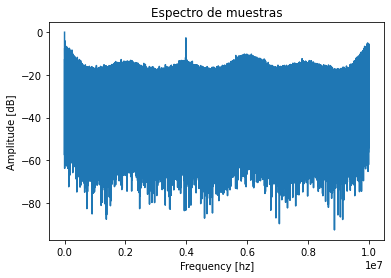

In [5]:
espectro = np.abs(fft(señal))
Espectro_normalizado=espectro/max(espectro);

plt.plot(20. * np.log10(Espectro_normalizado));
plt.title('Espectro de muestras')
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [hz]')

In [6]:
#filtro pasa bajas
y = signal.decimate(señal,q=5,ftype='fir')

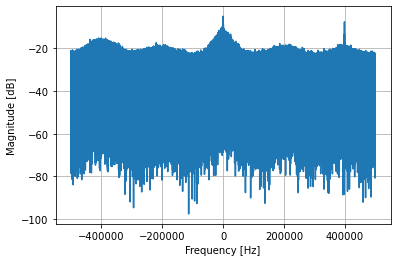

In [7]:
Fs = 1e6 # sample rate
N = 10e6 # number of samples simulate

PSD = (np.abs(np.fft.fft(señal))/N)**2
PSD_log = 10.0*np.log10(PSD)
PSD_shifted = np.fft.fftshift(PSD_log)

f = np.arange(Fs/-2.0, Fs/2.0, Fs/N) # start, stop, step

plt.plot(f, PSD_shifted)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)
plt.show()

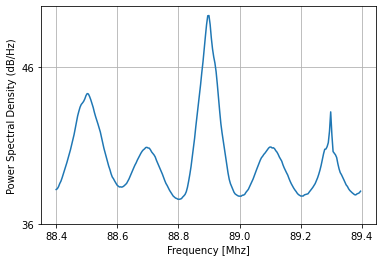

In [19]:
plt.psd(señal,Fs=Fs/1e6,Fc=88.9)
plt.xlabel('Frequency [Mhz]')
plt.show()